<h1 align=center> LDA Algorithm In Depth </h1>

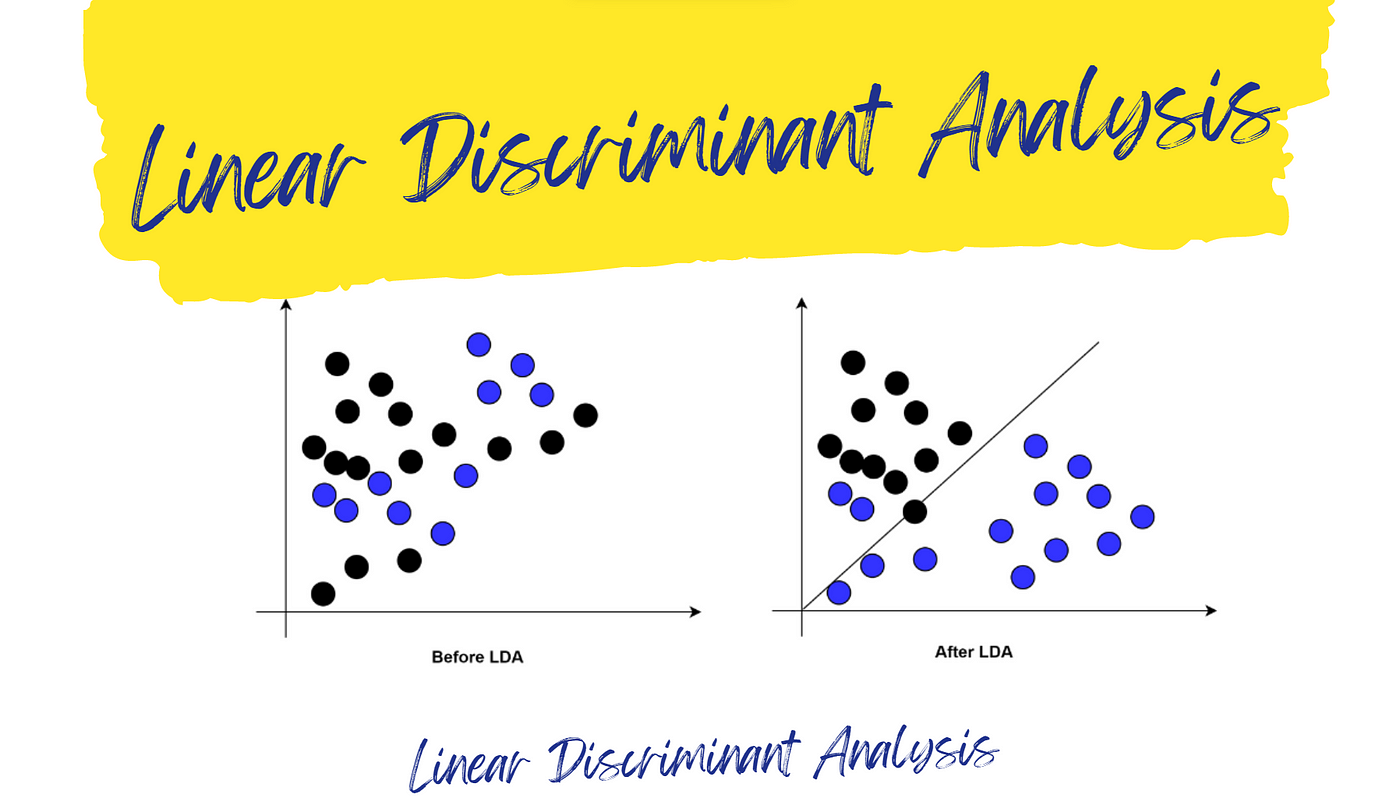

- Stands for linear discriminant analysis
- Supervised learning algorithm
- Used for classification problems
- Dimensionality reduction technique
- Better having feature scaling
- Same as PCA, but it focuses on maximizing the separability among known categories
- It works by finding linear combinations of features that best separate two or more classes in the dataset


**Two criteria used in LDA:**
1. Maximize the distance between means of the two classes
2. Minimize the variance within each class

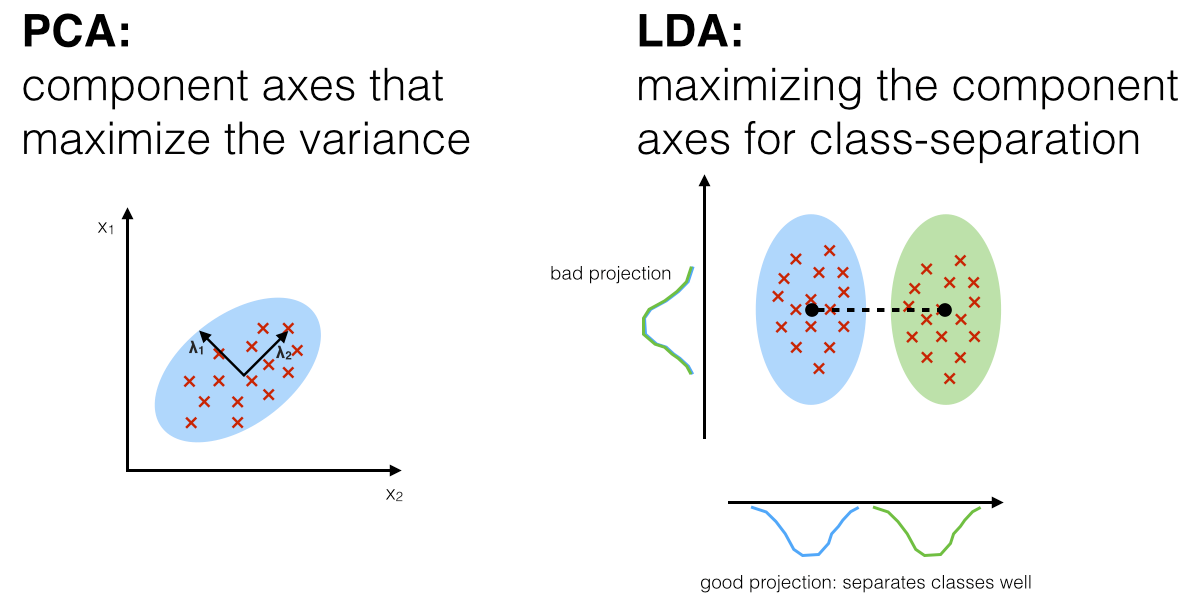


### How does LDA work?

⇒ Imagine you have a dataset where you want to classify emails as spam or not spam. LDA would analyze features like word frequency and sender information to find a linear combination (a weighted sum) of these features that best separates spam emails from legitimate ones. This essentially creates a decision boundary, like a line or plane in higher dimensions, that maximizes the separation between the classes while minimizing the overlap within each class.

1. **Maximizing class separability**: LDA aims to find a projection that maximizes the separation between classes by maximizing the ratio of between-class variance to within-class variance.
2. **Dimensionality reduction**: LDA projects the input data onto a lower-dimensional space while preserving class discriminatory information as much as possible.
3. **Decision rule**: After dimensionality reduction, LDA applies a decision rule to assign new samples to the class with the highest posterior probability based on the class means and variances.


### Steps involved in LDA

**1. Data Preprocessing**

- Gather your dataset, ensuring it has features (independent variables) and corresponding class labels (dependent variable)
- If necessary, preprocess the data by handling missing values, normalizing or standardizing features, and splitting the dataset into training and testing sets

**2. Compute Mean Vectors**

- Calculate the mean vector for each class in your data. This represents the “center” of each class in the feature space

**3. Compute Scatter Matrices**

There are two main **scatter matrices** used in LDA:

- **Within-Class Scatter Matrix (Sw):** measures the variance of the data within each class
- **Between-Class Scatter Matrix (Sb):** measures how much the means of different classes differ from each other

**4. Compute Eigenvectors and Eigenvalues**:

- Calculate the eigenvectors and eigenvalues of the matrix ***Sw^(-1) * Sb***
- The eigenvectors represent the directions (or axes) of maximum variance, while the eigenvalues represent the amount of variance explained by each eigenvector

**5. Select Linear Discriminants**:

- Select the top k eigenvectors (linear discriminants) corresponding to the k largest eigenvalues to form the transformation matrix W

```
import numpy as np

# Assuming you have already computed Sw and Sb matrices
Sw_inverse = np.linalg.inv(Sw)
Sw_inverse_Sb = np.dot(Sw_inverse, Sb)

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(Sw_inverse_Sb)

# Sort eigenvectors based on eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort indices in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the top k eigenvectors if needed
k = ...  # Number of discriminants to select
selected_eigenvalues = sorted_eigenvalues[:k]
selected_eigenvectors = sorted_eigenvectors[:, :k]
```

**6. Project Data onto Discriminant Space**:

- Project the original data onto the discriminant space defined by the selected linear discriminants (W)
- This is done by multiplying the original feature matrix by the transformation matrix W

```
import numpy as np

# Assuming you have already computed the eigenvectors and eigenvalues
# selected_eigenvectors: Matrix containing selected eigenvectors as columns
# X: Original data matrix (n_samples, n_features)

# Project data onto discriminant space
X_lda = np.dot(X, selected_eigenvectors)

# X_lda now contains the data projected onto the discriminant space
```

**7. Classification or Dimensionality Reduction**:

- **For classification tasks:** Apply a classifier (e.g., nearest neighbor classifier, logistic regression) on the projected data to classify new samples
- **For dimensionality reduction:** Use the projected data with reduced dimensions for visualization or subsequent analysis


### Advantages of LDA:

- **Dimensionality reduction**: LDA reduces the dimensionality of the dataset while preserving class discriminatory information, making it useful for visualization
- **Effective Classification:** LDA excels at finding the optimal linear separation between classes, making it a powerful tool for classification tasks
- **Works Well with Moderate Data:** LDA performs well when you have a decent amount of labeled data, especially when the data follows Gaussian distributions

### Disadvantages of LDA:

- **Assumes normality**: LDA assumes that the features are normally distributed within each class, which might not hold true in practice
- **Sensitivity to outliers**: LDA is sensitive to outliers, which can affect the estimation of class means and covariances
- **Linear decision boundaries**: LDA assumes that the decision boundaries between classes are linear, which might not be the case for complex datasets

In [1]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

[1]
